In [1]:
import numpy as np
import pandas as pd
import re
import csv
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi
%pprint

Pretty printing has been turned OFF


In [2]:
nlp = spacy.load('ru_core_news_sm')

In [3]:
# I read in my txt version of the textbook dictionary using utf-8 encoding and I'm able to read it in as a list of
# lowercased russian words their page number and definition.
nti = open('./textbook_vocab_data/novice_to_intermediate.txt', encoding= 'utf8')
nti = nti.read() 
nti[:2000] # very messy ugh

'Авария 13 – traffic accident\nавтобус 12 – bus\nавтомобиль 12 – car\nавтомойка 13 – car wash\nаксессуары 13, 15 – accessories\nалкогольный напиток 16 – alcoholic drink\nаллергия 16 – allergy\nальпинизм 10 – mountain climbing\nангина 16 – strep throat\nанкета 14 – application form\nапельсин 5 – orange\nарбуз 5 – watermelon\nаренда 11 – rent n.\nаспирантура 1 – graduate school\nафиша 10 – poster\nБанан 5 – banana\nбанкомат 13 – ATM\nбарабаны 10 – drums\nбаскетбол 10 – basketball\nбег 10 – running\nбежать ~ бегать 12 – to run\nбез (+ gen.) 3 – without\nбезветренный 15 – windless, calm\nбелок (pl. белки) 5 – protein\nбензин 13 – gasoline\nберег (prep.: на берегу) 1 – сoast, shore\nбесплатный 14 – free\nбеспокоить (impf. кого?) 16 – to bother, disturb\nбеспокоиться (impf. о ком? о чём? за кого? за что? colloq.) 16 – to worry, be worried\nбижутерия 13 – jewelry\nблин (pl. -ы) 6 – pancake\nблокнот 7 – notebook\nблондин 2 – blond (man) \nблондинка 2 – blonde (woman)\nблузка 15 – blouse\nблюдо

In [4]:
nti_txt = nti.split('\n') # I turn the file into a list, splitting on linebreaks to divide most of the vocab items
nti_txt_low = [x.lower() for x in nti_txt] # Stress marking was encoded with capital letters, so I lower everything
ntiplay = nti_txt_low[:30] # let't take a look at some of the entries and make it a play set
ntiplay

['авария 13 – traffic accident', 'автобус 12 – bus', 'автомобиль 12 – car', 'автомойка 13 – car wash', 'аксессуары 13, 15 – accessories', 'алкогольный напиток 16 – alcoholic drink', 'аллергия 16 – allergy', 'альпинизм 10 – mountain climbing', 'ангина 16 – strep throat', 'анкета 14 – application form', 'апельсин 5 – orange', 'арбуз 5 – watermelon', 'аренда 11 – rent n.', 'аспирантура 1 – graduate school', 'афиша 10 – poster', 'банан 5 – banana', 'банкомат 13 – atm', 'барабаны 10 – drums', 'баскетбол 10 – basketball', 'бег 10 – running', 'бежать ~ бегать 12 – to run', 'без (+ gen.) 3 – without', 'безветренный 15 – windless, calm', 'белок (pl. белки) 5 – protein', 'бензин 13 – gasoline', 'берег (prep.: на берегу) 1 – сoast, shore', 'бесплатный 14 – free', 'беспокоить (impf. кого?) 16 – to bother, disturb', 'беспокоиться (impf. о ком? о чём? за кого? за что? colloq.) 16 – to worry, be worried', 'бижутерия 13 – jewelry']

It was ultimately easier to use a less coding-intensive solution to end up with a txt file that I can read into this environment. I'm going to try to keep the russian vocabulary item and its english definition so I'll try to get rid of some of the formatting weirdness with regular expressions. I will have to be careful with these extended definitions that continue on to multiple lines

In [5]:
# First, We need to get rid of any page numbers and extraneous white spaces
ntiplay = [re.sub('(\s\d+,|\s\d+\s|\|)', ' ', x) for x in ntiplay]
ntiplay

['авария – traffic accident', 'автобус – bus', 'автомобиль – car', 'автомойка – car wash', 'аксессуары  – accessories', 'алкогольный напиток – alcoholic drink', 'аллергия – allergy', 'альпинизм – mountain climbing', 'ангина – strep throat', 'анкета – application form', 'апельсин – orange', 'арбуз – watermelon', 'аренда – rent n.', 'аспирантура – graduate school', 'афиша – poster', 'банан – banana', 'банкомат – atm', 'барабаны – drums', 'баскетбол – basketball', 'бег – running', 'бежать ~ бегать – to run', 'без (+ gen.) – without', 'безветренный – windless, calm', 'белок (pl. белки) – protein', 'бензин – gasoline', 'берег (prep.: на берегу) – сoast, shore', 'бесплатный – free', 'беспокоить (impf. кого?) – to bother, disturb', 'беспокоиться (impf. о ком? о чём? за кого? за что? colloq.) – to worry, be worried', 'бижутерия – jewelry']

In [6]:
# let's make this into a dataframe and see what we can do
df_ntiplay=pd.DataFrame(ntiplay,columns=['Entry'])
df_ntiplay

,Entry
0,авария – traffic accident
1,автобус – bus
2,автомобиль – car
3,автомойка – car wash
4,аксессуары – accessories
5,алкогольный напиток – alcoholic drink
6,аллергия – allergy
7,альпинизм – mountain climbing
8,ангина – strep throat
9,анкета – application form


In [7]:
df_ntiplay = df_ntiplay.join(df_ntiplay['Entry'].str.split('–', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_ntiplay

,Entry,Russian,English
0,авария – traffic accident,авария,traffic accident
1,автобус – bus,автобус,bus
2,автомобиль – car,автомобиль,car
3,автомойка – car wash,автомойка,car wash
4,аксессуары – accessories,аксессуары,accessories
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink
6,аллергия – allergy,аллергия,allergy
7,альпинизм – mountain climbing,альпинизм,mountain climbing
8,ангина – strep throat,ангина,strep throat
9,анкета – application form,анкета,application form


In [8]:
df_ntiplay['Extra'] = df_ntiplay['Russian'].str.extract('(\(.*?\))', expand=True)
df_ntiplay = df_ntiplay.fillna('')
df_ntiplay

,Entry,Russian,English,Extra
0,авария – traffic accident,авария,traffic accident,
1,автобус – bus,автобус,bus,
2,автомобиль – car,автомобиль,car,
3,автомойка – car wash,автомойка,car wash,
4,аксессуары – accessories,аксессуары,accessories,
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink,
6,аллергия – allergy,аллергия,allergy,
7,альпинизм – mountain climbing,альпинизм,mountain climbing,
8,ангина – strep throat,ангина,strep throat,
9,анкета – application form,анкета,application form,


In [9]:
df_ntiplay['Russian'] = df_ntiplay['Russian'].replace('(\(.*?\))', '', regex=True)
df_ntiplay

,Entry,Russian,English,Extra
0,авария – traffic accident,авария,traffic accident,
1,автобус – bus,автобус,bus,
2,автомобиль – car,автомобиль,car,
3,автомойка – car wash,автомойка,car wash,
4,аксессуары – accessories,аксессуары,accessories,
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink,
6,аллергия – allergy,аллергия,allergy,
7,альпинизм – mountain climbing,альпинизм,mountain climbing,
8,ангина – strep throat,ангина,strep throat,
9,анкета – application form,анкета,application form,


In [10]:
nti_sub = [re.sub('(\s\d+,|\s\d+\s|\|| 3| 3)', ' ', x) for x in nti_txt_low]
df_nti=pd.DataFrame(nti_sub,columns=['Entry'])
df_nti=df_nti.join(df_nti['Entry'].str.split('–', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_nti['Extra'] = df_nti['Russian'].str.extract('(\(.*?\))', expand=True)
df_nti = df_nti.fillna('')
df_nti['Russian'] = df_nti['Russian'].replace('(\(.*?\))', '', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('а́', 'а', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('я́', 'я', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('э́', 'э', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('е́', 'е', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('ы́', 'ы', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('и́', 'и', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('о́', 'о', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('у́', 'у', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('ю́', 'ю', regex=True)
df_nti=df_nti[['Russian','English','Extra']]
df_nti.tail()

,Russian,English,Extra
914,яблоко,apple,
915,являться,to be (in official or formal contexts),(impf. кем? чем?)
916,ягода,berry,
917,яичница,fried eggs,
918,яркий,bright,"(-ая, -ое, -ие)"


In [11]:
df_nti['Level'] = 'Int'
df_nti

,Russian,English,Extra,Level
0,авария,traffic accident,,Int
1,автобус,bus,,Int
2,автомобиль,car,,Int
3,автомойка,car wash,,Int
4,аксессуары,accessories,,Int
...,...,...,...,...
914,яблоко,apple,,Int
915,являться,to be (in official or formal contexts),(impf. кем? чем?),Int
916,ягода,berry,,Int
917,яичница,fried eggs,,Int


In [12]:
ita = open('./textbook_vocab_data/intermediate_to_advanced.txt', encoding= 'utf8')
ita = ita.read()
ita[:2000] # very messy ugh

"АбсолЮтно 3 - absolutely \nаварИйное состоЯние 5 - unsafe condition \nакварель (f) 3 - watercolor \nаккуратный 2 - neat, tidy, well organized; orderly \nактуально 1 - timely \nакция (акции) 9 - share (stocks) \nальтернатИва 6 - alternative \nамфитеатр 3 - (raised) rear part in orchestra section (theater) \nанализИровать/проанализИровать (что?) 1 - to analyze \nангина 7 - strep throat \nантракт 3 - intermission \nаполитИчность 6 - indifference towards politics \nаттестат 1 - high school diploma \nБаловать/избаловать (кого?) 4 - to indulge, to pamper \nбедность 4 - poverty \nбездельничать 2 - to loaf, not do anything \nбездомный 5 - homeless \nбезопасность 4 - security \nбезработица 2 - unemployment, joblessness \nбезработный (n.) 2 - unemployed (person) \nбезразлИчный 6 - indifferent \nбезусловно 1 - unconditionally; for sure \nбелкИ (sing. белoк) 7 - proteins \nбельэтаж 3 - dress circle; first tier \nбензИн 9 - gas (gasoline) \nберечь  (impf кого?) 4 - to take good care of \nбеспокоит

In [13]:
ita_txt = ita.split('\n') # I turn the file into a list, splitting on linebreaks to divide most of the vocab items
ita_txt_low = [x.lower() for x in ita_txt] # Stress marking was encoded with capital letters, so I lower everything
itaplay = ita_txt_low[:30] # let't take a look at some of the entries and make it a play set
itaplay

['абсолютно 3 - absolutely ', 'аварийное состояние 5 - unsafe condition ', 'акварель (f) 3 - watercolor ', 'аккуратный 2 - neat, tidy, well organized; orderly ', 'актуально 1 - timely ', 'акция (акции) 9 - share (stocks) ', 'альтернатива 6 - alternative ', 'амфитеатр 3 - (raised) rear part in orchestra section (theater) ', 'анализировать/проанализировать (что?) 1 - to analyze ', 'ангина 7 - strep throat ', 'антракт 3 - intermission ', 'аполитичность 6 - indifference towards politics ', 'аттестат 1 - high school diploma ', 'баловать/избаловать (кого?) 4 - to indulge, to pamper ', 'бедность 4 - poverty ', 'бездельничать 2 - to loaf, not do anything ', 'бездомный 5 - homeless ', 'безопасность 4 - security ', 'безработица 2 - unemployment, joblessness ', 'безработный (n.) 2 - unemployed (person) ', 'безразличный 6 - indifferent ', 'безусловно 1 - unconditionally; for sure ', 'белки (sing. белoк) 7 - proteins ', 'бельэтаж 3 - dress circle; first tier ', 'бензин 9 - gas (gasoline) ', 'беречь

In [14]:
ita_sub = [re.sub('(\s\d+,|\s\d+\s|\|| 3| 3)', ' ', x) for x in ita_txt_low]
df_ita=pd.DataFrame(ita_sub,columns=['Entry'])
df_ita=df_ita.join(df_ita['Entry'].str.split('-', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_ita['Extra'] = df_ita['Russian'].str.extract('(\(.*?\))', expand=True)
df_ita = df_ita.fillna('')
df_ita['Russian'] = df_ita['Russian'].replace('(\(.*?\))', '', regex=True)
df_ita=df_ita[['Russian','English','Extra']]
df_ita

,Russian,English,Extra
0,абсолютно,absolutely,
1,аварийное состояние,unsafe condition,
2,акварель,watercolor,(f)
3,аккуратный,"neat, tidy, well organized; orderly",
4,актуально,timely,
...,...,...,...
1195,язва,ulcer,
1196,яма,pothole,
1197,яркий,bright,
1198,яркие огни,bright lights,


In [15]:
df_ita['Level'] = 'Adv'
df_ita

,Russian,English,Extra,Level
0,абсолютно,absolutely,,Adv
1,аварийное состояние,unsafe condition,,Adv
2,акварель,watercolor,(f),Adv
3,аккуратный,"neat, tidy, well organized; orderly",,Adv
4,актуально,timely,,Adv
...,...,...,...,...
1195,язва,ulcer,,Adv
1196,яма,pothole,,Adv
1197,яркий,bright,,Adv
1198,яркие огни,bright lights,,Adv


In [16]:
df_vocab = pd.concat([df_nti,df_ita], axis=0)
df_vocab = df_vocab.sort_values(by='Russian')
df_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Russian  2119 non-null   object
 1   English  2119 non-null   object
 2   Extra    2119 non-null   object
 3   Level    2119 non-null   object
dtypes: object(4)
memory usage: 82.8+ KB


In [17]:
df_vocab.sample(n=30)

,Russian,English,Extra,Level
139,гель для душа,shower gel,,Int
392,морковка,carrot,(gen. pl. морко́вок),Int
49,бояться,to be afraid,(impf. + inf.),Int
1004,составлять/составить,"to соmроsе, mаkе up; to аmоunt to, to соmе to",(что?),Adv
806,природные ресурсы,natural resources,,Adv
363,кардинально,radically,,Adv
585,организм,body,,Adv
177,гостеприимный,hospitaыe,,Adv
838,улучшать/улучшить,to improve,(что? здоро́вье),Int
362,кандидат,candidate (for the post of president; for par...,(от чего? партии на/во что? на пост президента...,Adv


In [18]:
df_vocab['Russian'] = df_vocab['Russian'].str.split('/| ~ |,')
df_vocab = df_vocab.explode('Russian').reset_index(drop=True)
cols = list(df_vocab.columns)
cols.append(cols.pop(cols.index('English')))
df_vocab = df_vocab[cols]

In [19]:
df_vocab['Russian'] = df_vocab.Russian.str.strip(' ')

In [20]:
df_vocab['Level']

0       Adv
1       Adv
2       Int
3       Int
4       Int
       ... 
2576    Adv
2577    Adv
2578    Adv
2579    Int
2580    Adv
Name: Level, Length: 2581, dtype: object

In [21]:
df_vocab.sample(n=30)

,Russian,Extra,Level,English
351,гармоничный,,Adv,harmonious
729,извлечь пользу,,Adv,to benefitfrom
512,дорожать,,Adv,"to iпcrease iп cost, cost тоrе"
842,контрабанда,,Adv,"contraband, smuggling"
406,гравюра,,Adv,priпt (as ап art form)
1322,отпуск,,Int,"vacation, time off (from work)"
1535,помимо,(чего?),Adv,besides
2537,чувство стыда,,Adv,feeling of shame
1885,расходиться,(с кем?),Adv,to split up
1279,ответить,(кому́? на вопро́с),Int,to answer (a question)


In [22]:
def get_spacy_POS(ru_str):
    tiny_doc1 = nlp(ru_str)
    out_list1 = []
    for token in tiny_doc1:
        out_list1.append((token.pos_))
    return out_list1

get_spacy_POS('худо́жественный фильм')

['ADJ', 'NOUN']

In [23]:
def get_spacy_lemma(ru_str):
    tiny_doc2 = nlp(ru_str)
    out_list2 = []
    for token in tiny_doc2:
        out_list2.append((token.lemma_))
    return out_list2

get_spacy_lemma('художественного фильма')

['художественный', 'фильм']

In [24]:
df_vocab['Lemma'] = df_vocab.Russian.map(get_spacy_lemma)

In [25]:
df_vocab['Lemma'] = df_vocab.Lemma.apply(lambda x: ','.join(map(str, x)))

In [26]:
df_vocab['Lemma'] = df_vocab['Lemma'].str.split(',')
df_vocab = df_vocab.explode('Lemma').reset_index(drop=True)
cols = list(df_vocab.columns)
cols.append(cols.pop(cols.index('Russian')))
df_vocab = df_vocab[cols]

In [27]:
df_vocab = df_vocab.drop_duplicates()

In [28]:
df_vocab['POS'] = df_vocab.Lemma.map(get_spacy_POS)

In [29]:
df_vocab['POS'] = df_vocab['POS'].astype(str)

In [30]:
df_vocab.drop(df_vocab[df_vocab.POS.isin(["['SPACE']","['PUNCT']"])].index, inplace=True)
df_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2973 entries, 0 to 2994
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Extra    2973 non-null   object
 1   Level    2973 non-null   object
 2   English  2973 non-null   object
 3   Lemma    2973 non-null   object
 4   Russian  2973 non-null   object
 5   POS      2973 non-null   object
dtypes: object(6)
memory usage: 162.6+ KB


In [46]:
df_vocab = df_vocab[['Russian','Lemma','POS','Level']].drop_duplicates()
df_vocab.sample(20)

,Russian,Lemma,POS,Level
1533,подойти,подойти,['VERB'],Adv
2191,слава,слава,['NOUN'],Adv
2598,утечка мозгов,утечка,['NOUN'],Adv
2238,совершать,совершать,['VERB'],Adv
2203,сломать,сломать,['VERB'],Int
954,льготный,льготный,['ADJ'],Adv
1754,председатель,председатель,['NOUN'],Adv
2469,трудоголизм,трудоголизм,['NOUN'],Adv
1623,понимать,понимать,['VERB'],Int
2407,сюсюкающий язык,сюсюкать,['VERB'],Int


In [52]:
df_vocab = df_vocab.groupby(['Russian','Lemma','POS'], as_index=False).agg({'Level': ' '.join})
df_vocab['Level'] = df_vocab['Level'].replace('Int Adv|Adv Int', 'Both', regex=True)
df_vocab.sample(20)

,Russian,Lemma,POS,Level
2151,селёдка,селёдка,['NOUN'],Int
662,зарплата,зарплата,['NOUN'],Both
2188,скучно,скучный,['VERB'],Int
785,исторический фильм,фильм,['NOUN'],Int
367,гарнир,гарнир,['NOUN'],Int
552,ездить на рыбалку,на,['ADP'],Int
349,выселять,выселять,['VERB'],Adv
308,выздороветь,выздороветь,['VERB'],Int
115,быть,быть,['AUX'],Int
909,курильщик,курильщик,['NOUN'],Adv


In [33]:
df_vocab.describe()

,Russian,Lemma,POS,Level
count,2758,2758,2758,2758
unique,2370,2426,13,3
top,научно-популярный фильм,на,['NOUN'],Adv
freq,4,11,1209,1520


In [54]:
df_vocab[df_vocab['Level'].value_counts()]

KeyError: "None of [Int64Index([1520, 1091, 147], dtype='int64')] are in the [columns]"

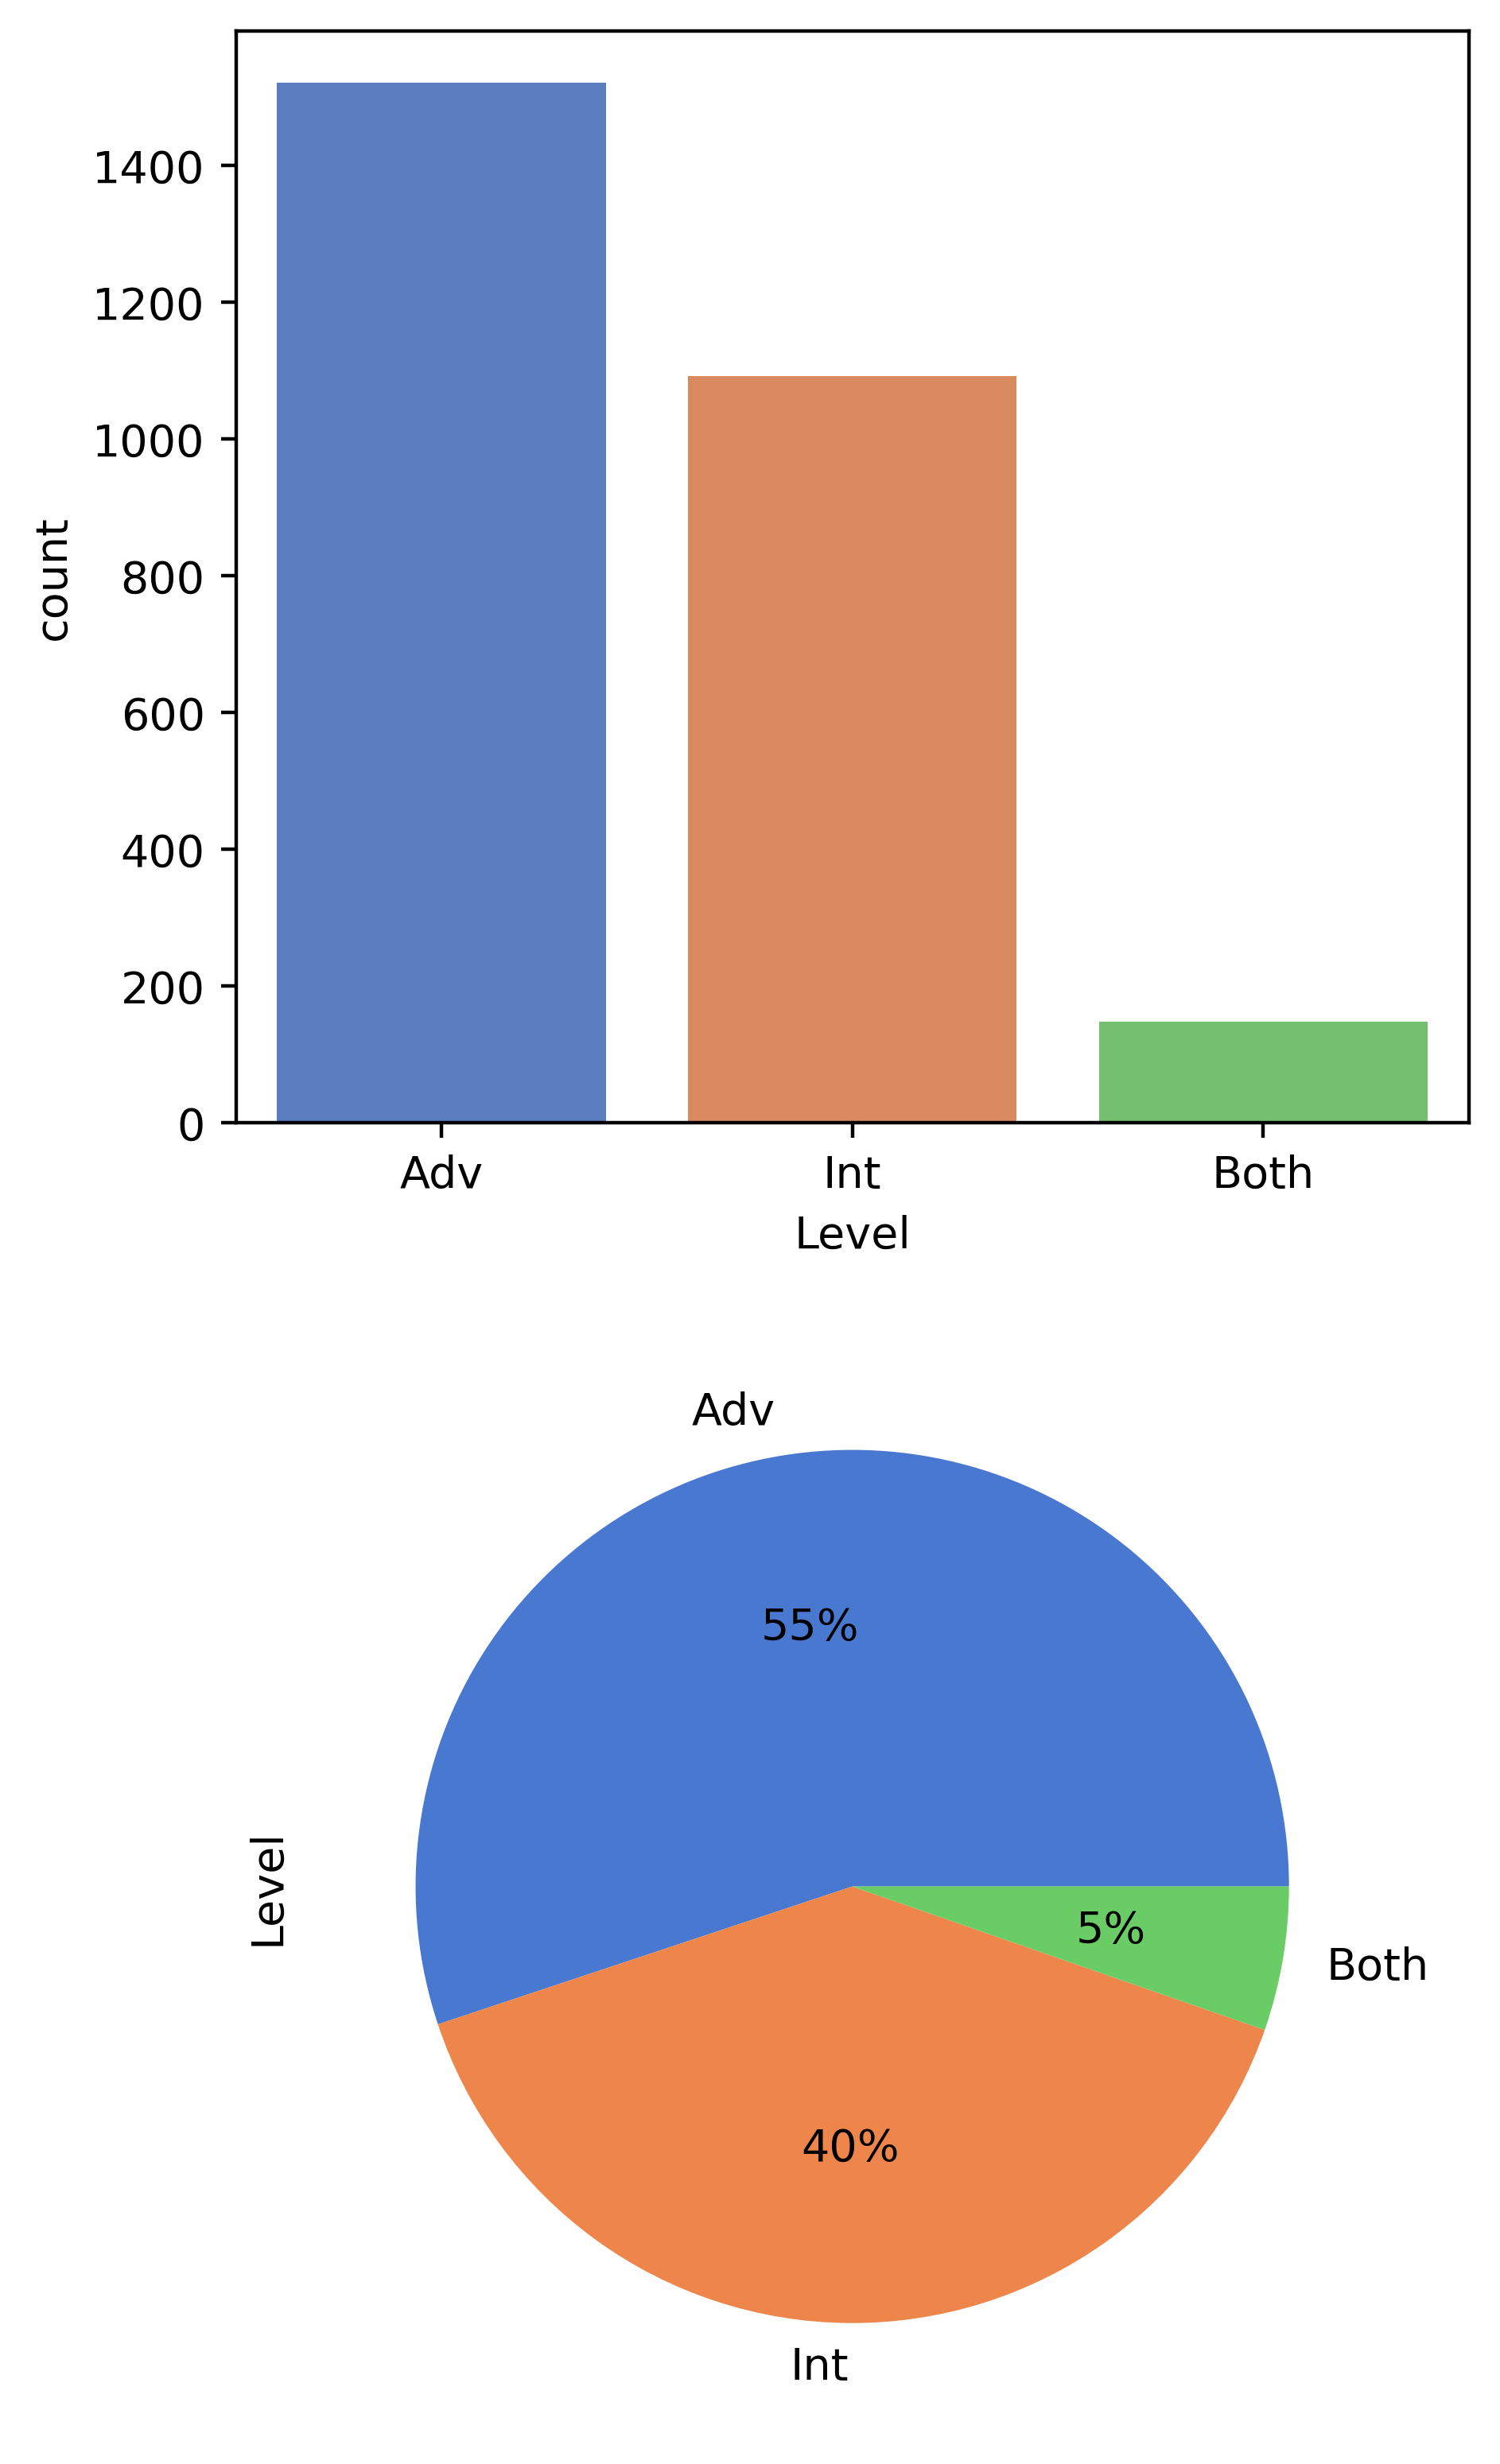

In [35]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(2, 1, figsize=(5,10), dpi=400, sharex=False, sharey=False)
sns.countplot(x='Level', data=df_vocab, ax=axes[0], palette='muted')
df_vocab['Level'].value_counts().plot.pie(ax=axes[1], autopct='%.0f%%', colors=colors)

filename1 = 'Item_Breakdown_by_Level'
plt.savefig(filename1+'.png', facecolor=('#e8f4f0'))

In [36]:
df_vocab['POS'].value_counts()

['NOUN']     1209
['VERB']     1041
['ADJ']       308
['ADV']        73
['ADP']        67
['PROPN']      11
['SCONJ']      10
['NUM']         8
['PART']        8
['PRON']        8
['DET']         8
['CCONJ']       5
['AUX']         2
Name: POS, dtype: int64

In [44]:
vocab_ct = pd.crosstab(df_vocab['Level'],df_vocab['POS'], normalize=True)
df_vocab_ct = vocab_ct.style.format('{:.2%}')
#dfi.export(df_vocab_ct, "LevelPosPercent.png")

<AxesSubplot:xlabel='Level'>

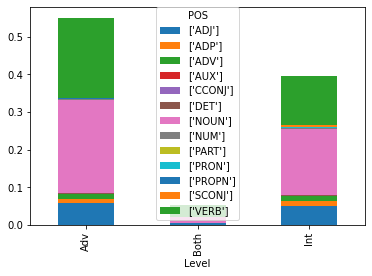

In [45]:
vocab_ct.plot.bar(stacked=True)

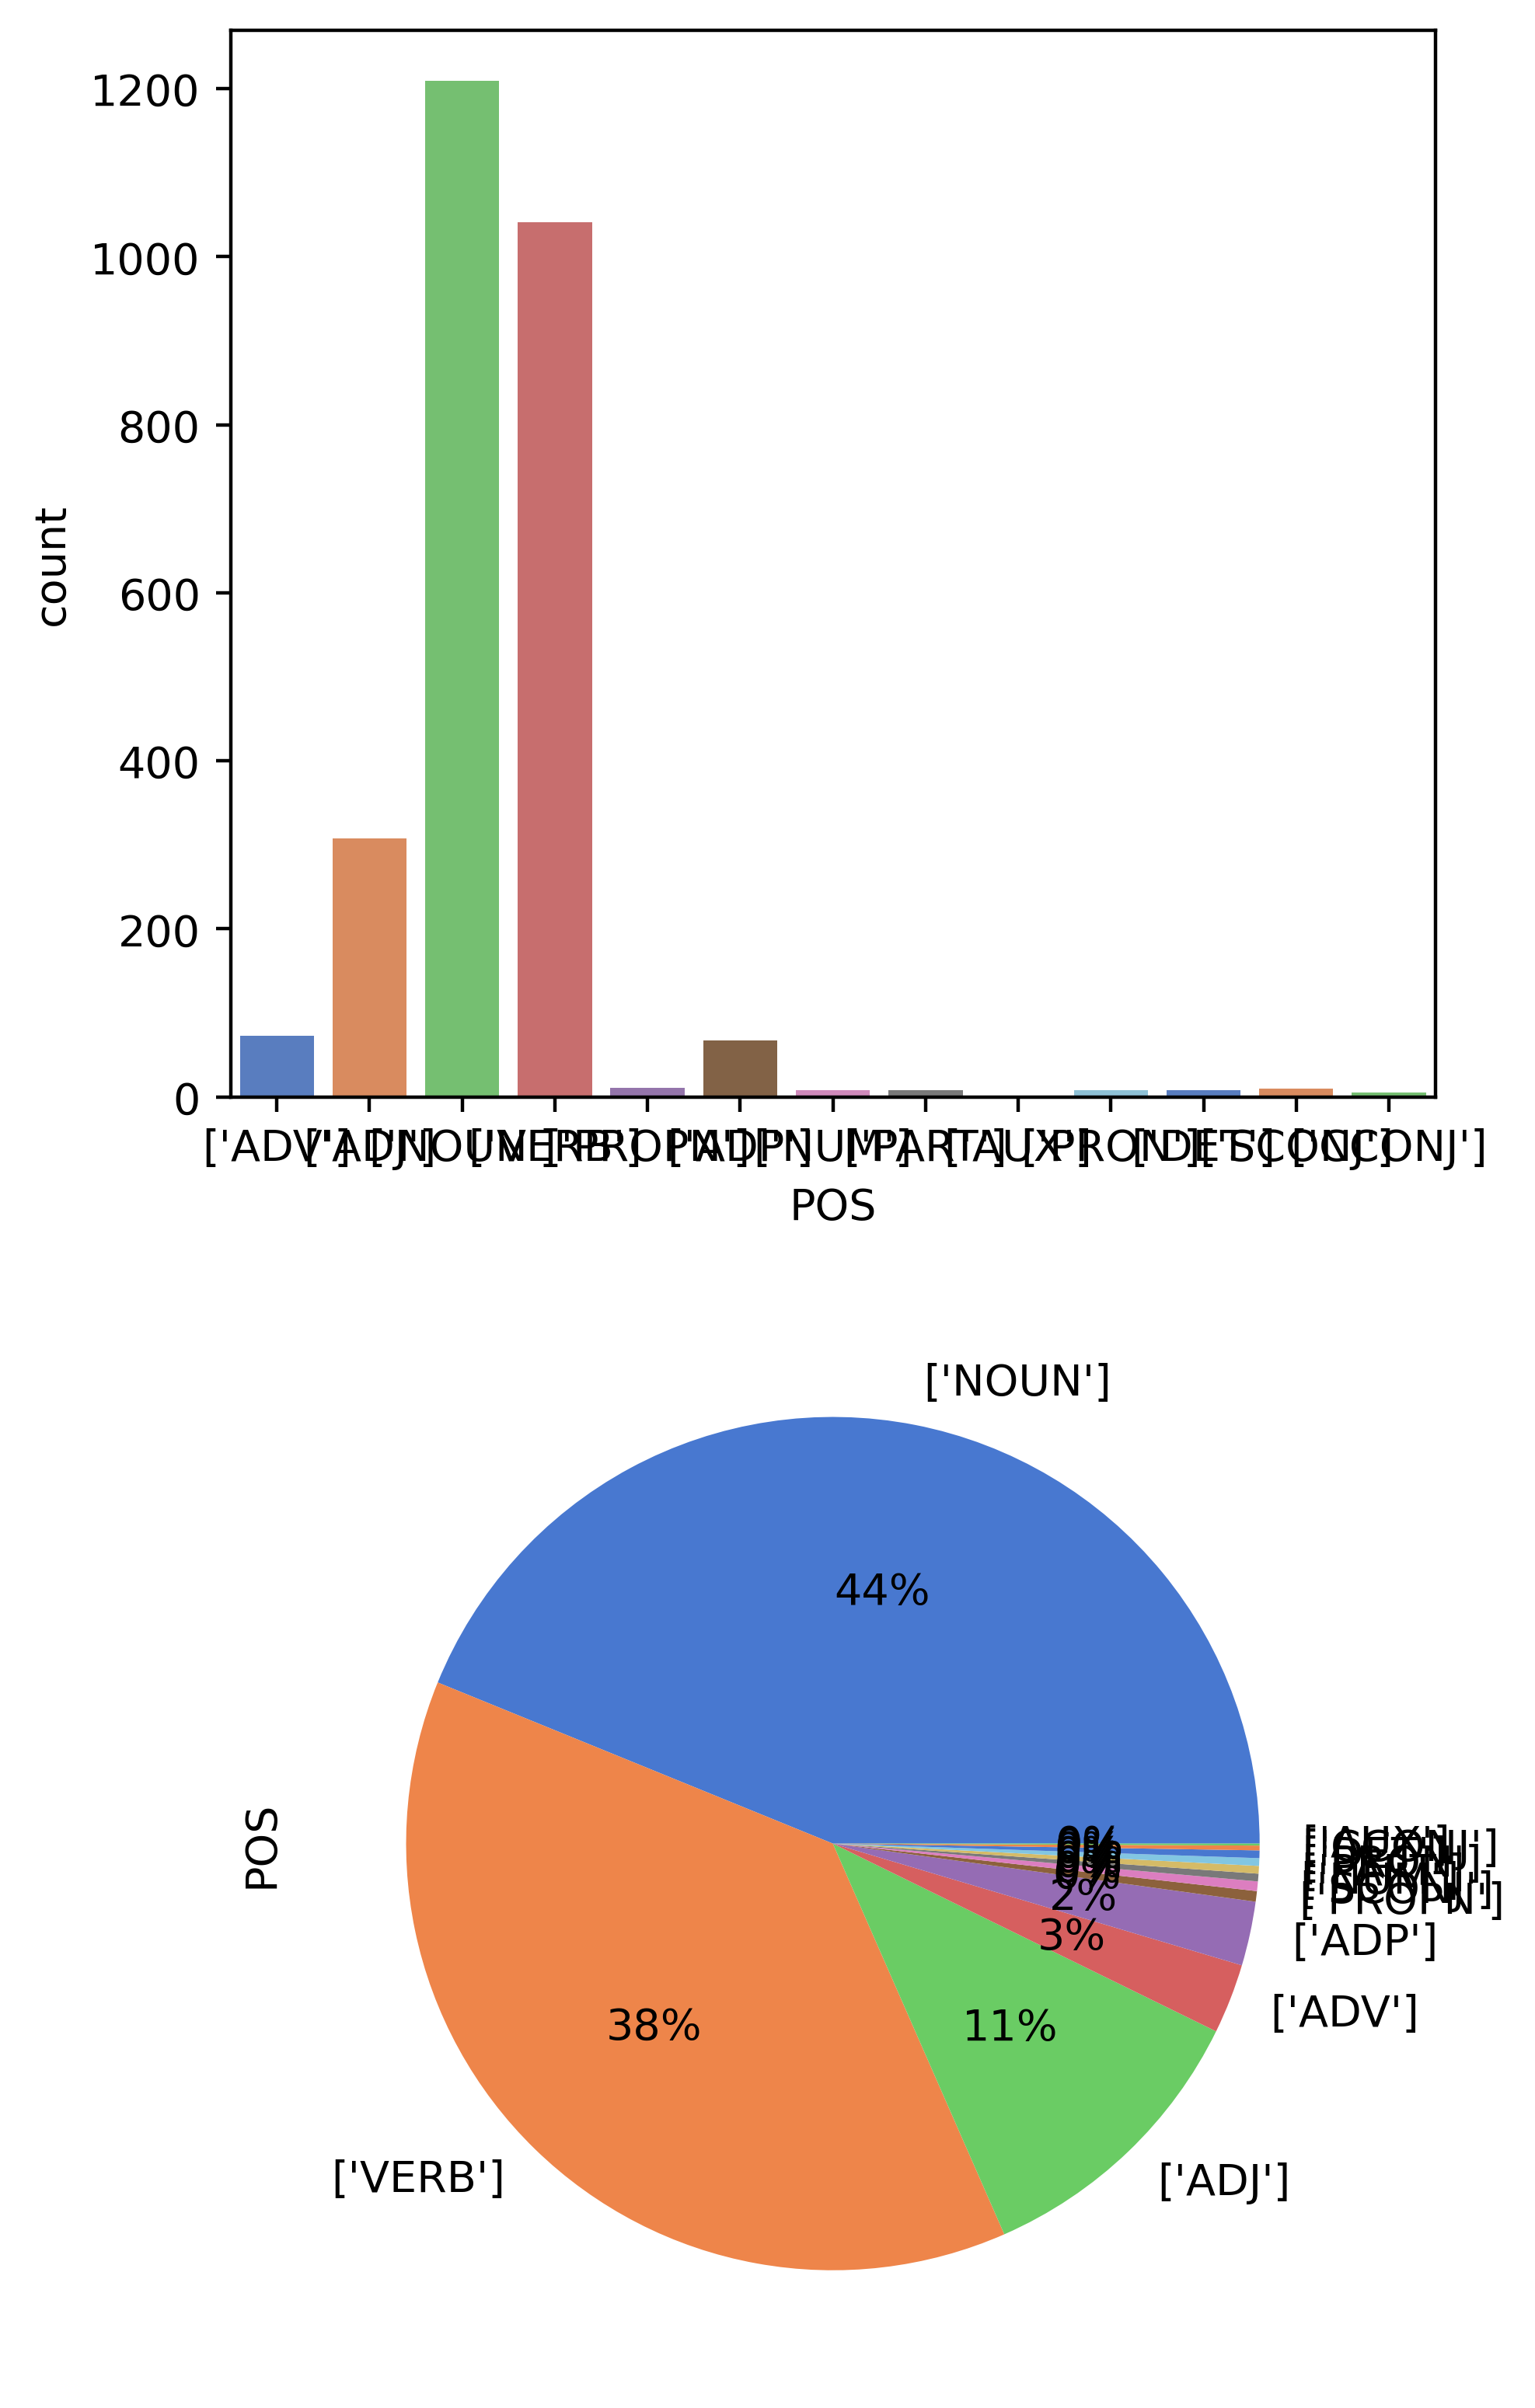

In [39]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(2, 1, figsize=(5,10), dpi=400, sharex=False, sharey=False)
sns.countplot(x='POS', data=df_vocab, ax=axes[0], palette='muted')
df_vocab['POS'].value_counts().plot.pie(ax=axes[1], autopct='%.0f%%', colors=colors)

filename2 = 'Total_POS'
plt.savefig(filename2+'.png', facecolor=('#e8f4f0'))

In [40]:
pos_by_level = df_vocab.groupby(['Level','POS']).size().reset_index()
pos_by_level

,Level,POS,0
0,Adv,['ADJ'],158
1,Adv,['ADP'],29
2,Adv,['ADV'],37
3,Adv,['AUX'],1
4,Adv,['CCONJ'],3
5,Adv,['DET'],1
6,Adv,['NOUN'],686
7,Adv,['NUM'],4
8,Adv,['PART'],4
9,Adv,['PRON'],2


In [41]:
table1 = pd.pivot_table(pos_by_level, index=['Level'], columns=['POS'])
table1 = table1.fillna(0).astype(int)
table1

0                                                             \
POS   ['ADJ'] ['ADP'] ['ADV'] ['AUX'] ['CCONJ'] ['DET'] ['NOUN'] ['NUM']   
Level                                                                      
Adv       158      29      37       1         3       1      686       4   
Both       12       1       2       0         0       0       39       0   
Int       138      37      34       1         2       7      484       4   

                                                      
POS   ['PART'] ['PRON'] ['PROPN'] ['SCONJ'] ['VERB']  
Level                                                 
Adv          4        2         7         1      587  
Both         0        0         2         0       91  
Int          4        6         2         9      363

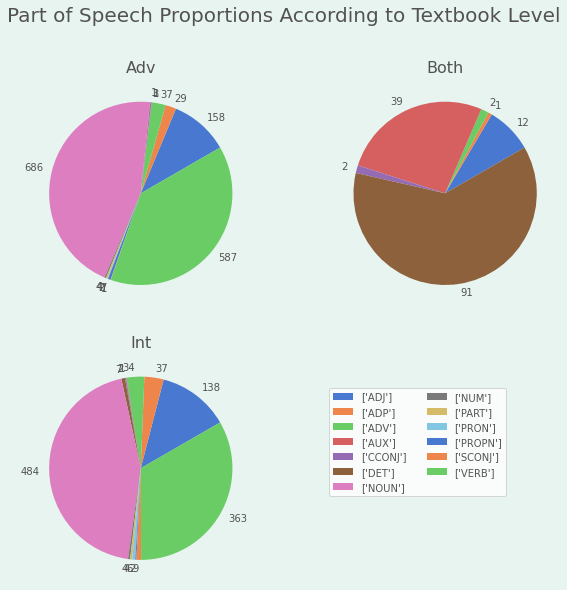

In [42]:
font_color = '#525252'

fig, axes = plt.subplots(2, 2, figsize=(10,10), facecolor='#e8f4f0')
fig.delaxes(ax= axes[1,1])

for i, (idx,row) in enumerate(table1.iterrows()):
    ax = axes[i // 2, i % 2]
    row = row[row.gt(row.sum()*.0002)]
    ax.pie(row,
           labels=row.values,
           startangle=30,
           colors=sns.color_palette('muted', 13),
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x[1] for x in row.index],
                        bbox_to_anchor=(1.3, .87),
                        loc='upper left',
                        ncol=2,
                        fancybox=True)
    for text in legend.get_texts():
        plt.setp(text, color=font_color)
        
fig.subplots_adjust(wspace=.2)

title = fig.suptitle('Part of Speech Proportions According to Textbook Level',
                     y=.95, fontsize=20, color=font_color)

plt.subplots_adjust(top=0.85, bottom=0.15)

filename3 = 'POS_Level_Comparisons'
plt.savefig(filename3+'.png', facecolor=('#e8f4f0'))